In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm

In [2]:
total_data = pd.read_csv("./FinalDatasets/TotalDataset.csv")

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39643009 entries, 0 to 39643008
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Date first seen  object 
 1   Duration         float64
 2   Proto            object 
 3   Src IP Addr      object 
 4   Src Pt           int64  
 5   Dst IP Addr      object 
 6   Dst Pt           float64
 7   Packets          int64  
 8   Bytes            int64  
 9   U                int64  
 10  A                int64  
 11  P                int64  
 12  R                int64  
 13  S                int64  
 14  F                int64  
 15  class            object 
 16  attackType       object 
dtypes: float64(2), int64(9), object(6)
memory usage: 5.0+ GB


In [4]:
total_data.tail(5)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,U,A,P,R,S,F,class,attackType
39643004,2019-03-06 21:18:57,0.0,UDP,216.239.36.10,53,158.129.192.2,48598.0,2,290,0,0,0,0,0,0,normal,none
39643005,2019-03-06 21:18:57,0.0,UDP,194.0.4.10,53,192.71.30.8,34617.0,2,268,0,0,0,0,0,0,normal,none
39643006,2019-03-06 21:18:57,0.0,UDP,83.171.8.8,53,31.13.112.156,19981.0,2,136,0,0,0,0,0,0,normal,none
39643007,2019-03-06 21:18:57,0.0,UDP,192.71.30.8,34617,194.0.4.10,53.0,2,138,0,0,0,0,0,0,normal,none
39643008,2019-03-06 21:18:57,0.0,UDP,2620:0:cc9::70,27547,2001:678:6::1,53.0,2,174,0,0,0,0,0,0,normal,none


# Data Analysis

<Axes: ylabel='count'>

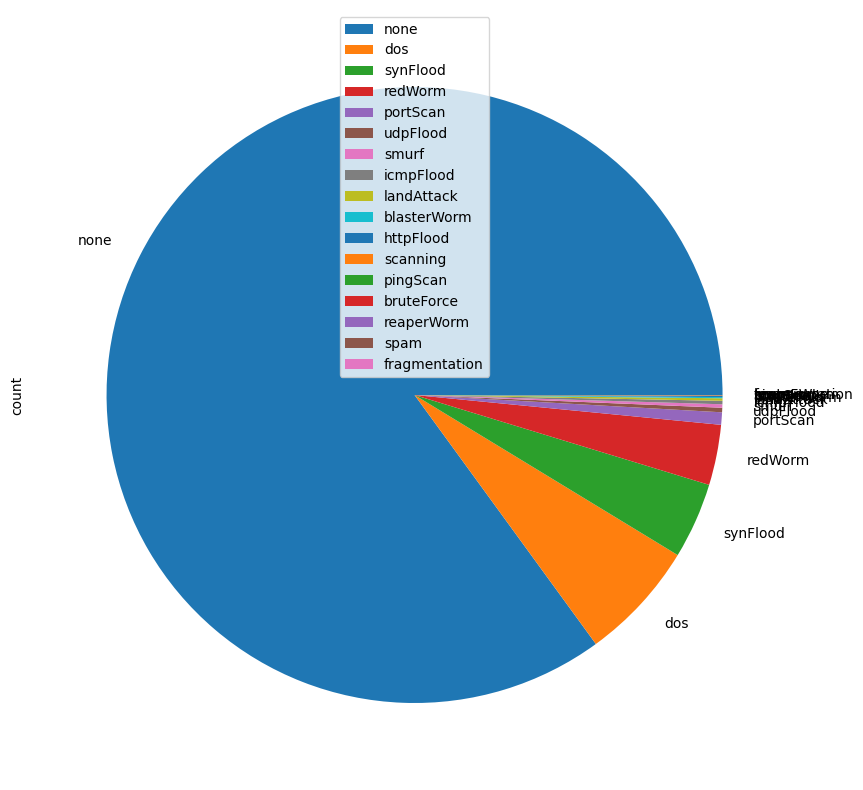

In [5]:
attack_type_df = pd.DataFrame(total_data.attackType.value_counts())
attack_type_df.plot.pie(y='count',figsize=(10, 10))

<Axes: xlabel='attackType'>

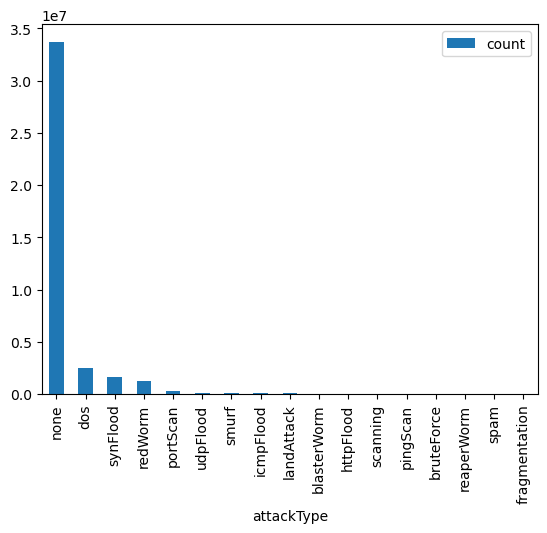

In [6]:
attack_type_df.plot.bar()

#### There is heavy imbalance of target variables, heavily leaning towards normal network flows. 
#### We would have to take note of this during our training and validation

# Feature Engineering

#### For now, I believe dividing up the 'Date first seen' column into year, month, day, and the respective time divisions would be more meaningful as features for our model.

In [7]:
split = total_data["Date first seen"][0].split(" ")

In [8]:
split[0].split("-")

['2017', '03', '15']

In [9]:
split[1].split(":")

['00', '01', '16.632']

In [10]:
year = []
month = []
days = []
hours = []
minutes = []
seconds = []

for i in tqdm(range(len(total_data))):
    split = total_data["Date first seen"][i].split(" ")
    first = split[0].split("-")
    second = split[1].split(":")

    year.append(first[0])
    month.append(first[1])
    days.append(first[2])

    hours.append(second[0])
    minutes.append(second[1])
    seconds.append(second[2])

total_data['year'] = year
total_data['month'] = month
total_data['days'] = days
total_data['hours'] = hours
total_data['minutes'] = minutes
total_data['seconds'] = seconds

100%|███████████████████████████| 39643009/39643009 [01:29<00:00, 443870.98it/s]


In [11]:
total_data.to_csv("./FinalDatasets/TotalDataset_Engineered.csv")